# Расчет дифференциальных уравнений на графах

## Задача 1. Моделирование транспортных потоков

### Часть 1. Модель транспортного потока

Для моделирования транспортных потоков будем использовать макроскопический подход.

Уравнения, описывающие поведение потока на автостраде:
$$
\begin{cases}
    & \rho_t + (\rho u)_x = 0 \\
    & u = V(\rho)
\end{cases}
$$

Фундаментальная диаграмма задается как:
$$
\begin{align*}
    & Q(\rho) = \alpha \left(
        a + (b-a) \frac{\rho}{\rho_{max}} - \sqrt{1 + y^2}
    \right) \\
    & a = \sqrt{1 + \lambda^2 p^2} \\
    & b = \sqrt{1 + \lambda^2 (1 - p)^2} \\
    & y = \lambda \left( \frac{\rho}{\rho_{max}} - p \right)
\end{align*}
$$

Скорость потока задается следующим образом:
$$
V(\rho, \omega) = \begin{cases}
    & \frac{Q(\rho)}{\rho} & ,\rho > 0 \\
    & Q_\rho(0) & ,\rho = 0
\end{cases}
$$

Найдем $Q_\rho(\rho)$:
$$
Q_\rho(\rho) = \alpha (b - a) \frac{1}{\rho_{max}} - \alpha \frac{y(\rho)}{\sqrt{1 + y(\rho)^2}} \frac{\lambda}{\rho_{max}}
$$

Заметим, что:
$$
\begin{align*}
    & y(0) = -\lambda p \\
    & \sqrt{1 + y(0)^2} = \sqrt{1 + \lambda^2 p^2} = a
\end{align*}
$$

Таким образом:
$$
Q_\rho(0) = \frac{\alpha}{\rho_{max}} \left(
    b - a + \frac{\lambda^2 p}{a}
\right)
$$

Также нам понадобятся следующие величины:
$$
\begin{align*}
    & \rho_c = \mathrm{argmax}_{\rho}(Q_{\alpha, \lambda, p}(\rho)) \\
    & Q^{max}_{\alpha, \lambda, p} = Q_{\alpha, \lambda, p}(\rho_c)
\end{align*}
$$

При этом:
$$
\begin{align*}
    & \rho_c = \rho_{max} \left( p + \frac{1}{\lambda} \cdot \frac{(b-a)}{\sqrt{\lambda^2 - (b-a)^2}} \right) \\
\end{align*}
$$

### Часть 2. Разностная схема

Сделаем замену $y := \rho \omega$.
Тогда система уравнений может быть переписана в виде:
$$
\begin{cases}
    & \rho_t + F(\rho)_x = 0 \\
    & u = V(\rho, y/\rho)
\end{cases}
$$

Систему можно записать в виде:
$$
\mathbf{U}_t + \mathbf{F}_x(\mathbf{U}) = 0
$$

Для численного приближения данной системы будем использовать метод Годунова.
Основная идея в применении следующей аппроксимации:
$$
\mathbf{U}^n_i \approx \frac{1}{\Delta x} \int\limits_{x_{i - 1/2}}^{x_{i + 1/2}} \mathbf{U}(x, t_n) dx
$$

Конечно-разностная аппроксимация исходных уравнений выглядит как:
$$
\mathbf{U}^{n+1}_i = \mathbf{U}^{n}_i - \frac{\Delta t}{\Delta x} \left(
    \mathbf{F}^n_{i+1/2} - \mathbf{F}^n_{i-1/2}
\right)
$$

Где значения потока $\mathbf{F}$ в полуцелых узлах записывается как:
$$
\begin{align*}
    & \mathbf{F}^n_{i + 1/2} = \mathbf{F}( \mathcal{R}( \mathbf{U}^n_{i} , \mathbf{U}^n_{i+1} ) ) \\
    & \mathbf{F}^n_{i - 1/2} = \mathbf{F}( \mathcal{R}( \mathbf{U}^n_{i-1} , \mathbf{U}^n_{i} ) )
\end{align*}
$$
Где $\mathcal{R}(\mathbf{U}_L, \mathbf{U}_R)$ обозначает решение задачи Римана для начальных состояний $\mathbf{U}_L$  и $\mathbf{U}_R$

Перепишем эти уравнения покомпонентно:
$$
\rho^{n+1}_j = \rho^{n}_j - \frac{\Delta t}{\Delta x} \left( Q^{n}_{j+1/2} - Q^{n}_{j-1/2} \right)
$$

Опишем решение задачи Римана.<br>
Используемое нами решение основано на функциях "отправки" и "получения":
$$
\begin{align*}
    & S(\rho_L, u_L) = \begin{cases}
        & \rho_L u_L 
        &,\rho_L \leq \rho_c \\
        & Q^{max}
        &,\rho_L > \rho_c
    \end{cases} \\
    & R(\rho_M, u_M) = \begin{cases}
        & Q^{max}
        &,\rho_M \leq \rho_c \\
        & \rho_M u_M
        &,\rho_M > \rho_c
    \end{cases}
\end{align*}
$$
Где $\rho_c(\omega_L)$ критическая плотность при заданном параметре $\omega_L$.

Промежуточные значения плотности и скорости задаются как:
$$
\begin{align*}
    & \rho_M(u_R) = \mathrm{argmin}_\rho \left( u_R - V(\rho)\right) \\
    & u_M(u_R) = \min \left\{ V_0, u_R \right\}
\end{align*}
$$
Где $V_0 = V(0)$

Таким образом, промежуточные значения потока вычисляются следующим образом:
$$
\mathcal{R}(\mathbf{U}_L, \mathbf{U}_R) = \min \left\{
    S(\rho_L, u_L), R(\rho_M, u_M) 
\right\}
$$

### Часть 3. Алгоритм

Опишем алгоритм:
    
1. Находим скорости в узлах:
    $$
        u^n_{j} = V(\rho^n_j, \omega^n_j)
    $$
    Где $j=0 \ldots, N+1$
    <br>
    
1. Находим промежуточные скорости:
    $$
    \begin{align*}
        & u^n_{j-1/2} = \min \left\{ V_0, u^n_{j} \right\}
    \end{align*}
    $$
    Где $j=1, \dots, N+1$
    <br>
    
1. Находим промежуточные плотности:
    $$
    \begin{align*}
        & \rho^n_{j-1/2} = \mathrm{argmin}_{\rho} \left( u^n_j - V(\rho) \right)
    \end{align*}
    $$
    Где $j=1, \ldots, N+1$
    <br>

2. Находим функции отправки и получения:
    $$
    \begin{align*}
        & S^n_{j-1/2} = S(\rho^n_{j-1}, u^n_{j-1}) \\
        & R^n_{j-1/2} = R(\rho^n_{j-1/2}, u^n_{j-1/2})
    \end{align*}
    $$
    Где $j=1,\ldots,N+1$
    <br>

5. Находим интенсивность потока:
    $$
    Q^n_{j-1/2} = \min \left\{ S^n_{j-1/2}, R^n_{j-1/2} \right\}
    $$
    Где $j=1,\ldots,N+1$
    <br>

6. Находим состояние системы на следующем временном шаге:
    $$
    \begin{align*}
        & \rho^{n+1}_j = \rho^{n}_j - \frac{\Delta t}{\Delta x} \left( Q^{n}_{j+1/2} - Q^{n}_{j-1/2} \right)
    \end{align*}
    $$
    Где $j=1,\ldots,N$

### Часть 4. Модель узлов

Каждое из ребер при обновлении возвращает свой исходящий и допустимый входящий потоки.

В ребре ставится следующая задача оптимизации:


### Часть X. Реализация

In [42]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#### Фундаментальная диаграмма

In [157]:
class FundamentalDiagram:
    def __init__(self, alpha, lmbda, p, rho_max):
        self.alpha = alpha
        self.lmbda = lmbda
        self.p = p
        self.rho_max = rho_max
        
        self._a = np.sqrt(1 + (self.lmbda * self.p)**2)
        self._b = np.sqrt(1 + (self.lmbda * (1 - self.p))**2)
        
        self.rho_c = self._calc_rho_c()
        self.Q_max = self.Q(self.rho_c)
        self.V0 = self.V(np.array([0]))[0]
        
    def Q(self, rho):
        a, b = (self._a, self._b)
        y = self.lmbda * (rho / self.rho_max - self.p)        
        Q = self.alpha * (a + (b - a) * rho / self.rho_max - np.sqrt(1 + y**2))
        return Q    
    
    def V(self, rho):
        zero_mask = np.isclose(rho, 0)
        V = np.zeros(rho.shape)
        if (~zero_mask).any():
            rho_masked = rho[~zero_mask]
            V[~zero_mask] = self.Q(rho_masked) / rho_masked
        if (zero_mask).any():
            rho_masked = rho[zero_mask]
            a, b = (self._a, self._b)
            y = self.lmbda * (rho_masked / self.rho_max - self.p)
            V[zero_mask] = self.alpha * (b - a + self.lmbda**2 * self.p / a) / self.rho_max
        return V
    
    def _calc_rho_c(self):        
        a, b = (self._a, self._b)        
        numerator = (b - a)
        denominator = self.lmbda * np.sqrt(self.lmbda**2 - (b - a)**2)
        addition = numerator / denominator
        
        rho_c = self.rho_max * (p + addition)
        return rho_c

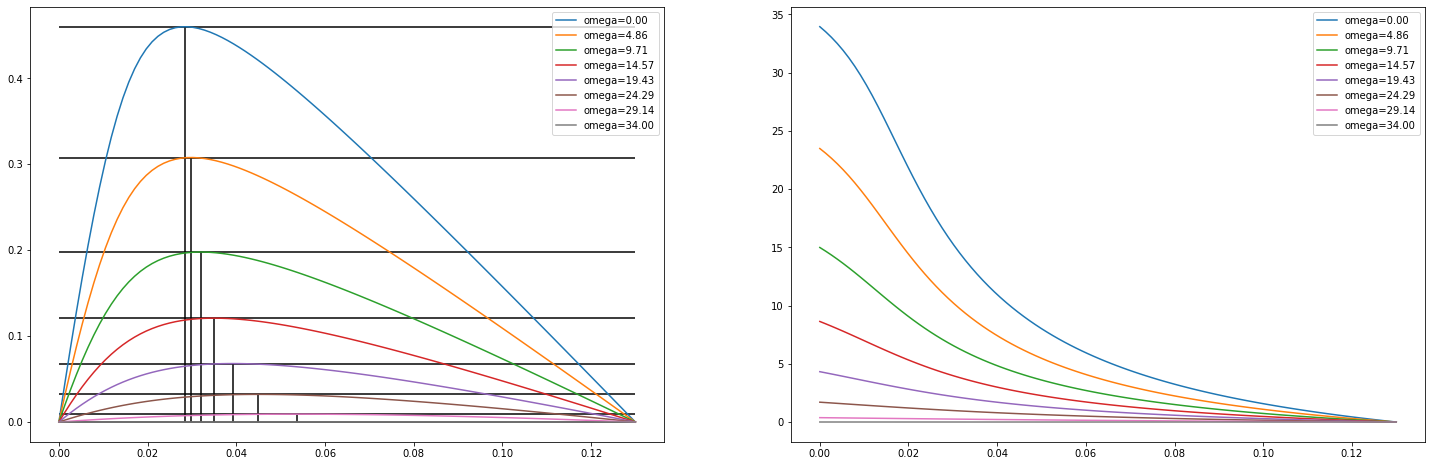

In [158]:
fig, ax = plt.subplots(1, 2, figsize=(25, 8))

calc_alpha = lambda omega: .3 * (1 - omega / 35.)
calc_lambda = lambda omega: 10. * (1 - omega / 35.)
calc_p = lambda omega: .1 * (1 - omega / 35.)

rho = np.linspace(0, rho_max, 100)
for w in np.linspace(0., 34., 8):
    
    alpha = calc_alpha(w)
    lmbda =  calc_lambda(w)
    p = calc_p(w)
    rho_max = 0.13
    
    fd = FundamentalDiagram(alpha, lmbda, p, rho_max)
    
    omega = w * np.ones(rho.shape)
    q = fd.Q(rho)
    v = fd.V(rho)
    rho_c = fd.rho_c
    q_max = fd.Q_max
    
    ax[0].plot(rho, q, label=f'omega={w:.2f}')
    ax[0].vlines(x=rho_c, ymin=0, ymax=q_max)
    ax[0].hlines(y=q_max, xmin=0, xmax=rho_max)
    ax[0].legend()

    ax[1].plot(rho, v, label=f'omega={w:.2f}')
    ax[1].legend()
plt.show()

In [159]:
omega = 30.
alpha_coeff = calc_alpha(omega)
lmbda_coeff =  calc_lambda(omega)
p_coeff = calc_p(omega)
rho_max = 0.13
fd = FundamentalDiagram(alpha_coeff, lmbda_coeff, p_coeff, rho_max)

#### Ребро графа

In [192]:
class Edge:
    def __init__(self, fundamental_diagram, length, dx):
        # estimate number of segments
        self.n = int(length / dx)
        self.dx = length / self.n
        # init edge
        self.fd = fundamental_diagram
        self.rho = np.zeros(self.n)
        self.omega = 30. * np.ones(self.n)
        
    def update(self, dt, q_in, q_out):
        # calc velocities
        u = self._calc_u(self.rho)
        # calc u_M, rho_M
        uM = self._calc_uM(self.rho, u)
        rhoM = self._calc_rhoM(self.rho, u)
        # calc S
        S = self._calc_S(self.rho, u, q_in)
        # calc R
        R = self._calc_R(rhoM, uM, q_out)
        # calc Q
        Q = np.minimum(S, R)
        # update state
        self.rho -= (dt / self.dx) * (Q[1:] - Q[:-1])
        # return state to graph
        flow_in = R[0]
        flow_out = S[-1]
        return flow_in, flow_out
        
    def _calc_u(self, rho):
        return self.fd.V(rho)
    
    def _calc_uM(self, rho, u):
        uR = u
        uML = self.fd.V0 * np.ones(rho.shape)
        return np.minimum(uML, uR)
    
    def _calc_rhoM(self, rho, u):
        uR = u
        
        alpha, lmbda, p = (self.fd.alpha, self.fd.lmbda, self.fd.p)
        a, b = (self.fd._a, self.fd._b)
        rho_max = self.fd.rho_max
        
        xi = alpha * (a + (b-a) * p) - uR * rho_max * p
        delta = (alpha * (b - a) - uR * rho_max) / lmbda
        
        sqrt_arg = -alpha**4 + alpha**2 * (xi**2 + delta**2)
        sqrt_expr = np.zeros(sqrt_arg.shape)
        sqrt_expr = np.sqrt(sqrt_arg, out=sqrt_expr, where=sqrt_arg>=0)
        y = (xi * delta + sqrt_expr) / (alpha**2 - delta**2)
        rho_sol = rho_max * (y + lmbda * p) / lmbda
        return rho_sol
    
    def _calc_S(self, rhoL, uL, q_in):
        rho_c = self.fd.rho_c
        Qmax = self.fd.Q_max
        rho_mask = rhoL > rho_c
        # calc S
        S = np.zeros(rhoL.shape)
        S[~rho_mask] = (rhoL * uL)[~rho_mask]
        S[rho_mask] = (Qmax * np.ones(rhoL.shape))[rho_mask]
        S = np.insert(S, 0, q_in)
        return S
    
    def _calc_R(self, rhoM, uM, q_out):
        rho_c = self.fd.rho_c
        Qmax = self.fd.Q_max
        rho_mask = rhoM > rho_c
        # calc R
        R = np.zeros(rhoM.shape)
        R[~rho_mask] = (Qmax * np.ones(rhoM.shape))[~rho_mask]
        R[rho_mask] = (rhoM * uM)[rho_mask]
        R = np.append(R, q_out)
        return R

In [193]:
length = 200.
edge = Edge(fd, length, 10.)

CPU times: user 12.6 ms, sys: 7.98 ms, total: 20.6 ms
Wall time: 18.8 ms


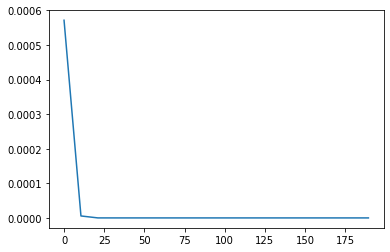

In [202]:
%%time
x = np.linspace(0, length, edge.n)
for i in range(1):
    edge.update(.1, 1., .0)
    if i%500 == 0:
        plt.plot(x[:-1], edge.rho[:-1])

In [144]:
edge.rho

array([ 3.75304187e+01,  5.37328267e-02,  5.30855557e-02,  5.23765248e-02,
        5.16549146e-02,  5.09353478e-02,  5.02224306e-02,  4.95175536e-02,
        4.88209804e-02,  4.81325633e-02,  4.74520106e-02,  4.67789906e-02,
        4.61131740e-02,  4.54542488e-02,  4.48019259e-02,  4.41559391e-02,
        4.35160437e-02,  4.28820145e-02,  4.22536437e-02, -5.04239054e+01])

#### Вершина графа

In [11]:
class Node:
    def __init__(self):
        pass